In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind 

In [161]:
tradedf=pd.read_csv("historical_data.csv")

In [162]:
sentidf=pd.read_csv("fear_greed_index.csv")

In [163]:
tradedf.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [164]:
tradedf.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [165]:
tradedf.shape

(211224, 16)

In [166]:
sentidf.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [167]:
sentidf.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [168]:
sentidf.shape

(2644, 4)

In [169]:
tradedf.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [170]:
sentidf.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [171]:
tradedf.drop(columns=["Account"] ,inplace=True)

In [172]:
tradedf.drop(columns=["Transaction Hash"] ,inplace=True) 

In [173]:
tradedf.drop(columns=["Trade ID"] ,inplace=True) 

In [174]:
tradedf.drop(columns=["Order ID"] ,inplace=True) 

In [175]:
tradedf.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Timestamp
0,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,True,0.345404,1.730000e+12
1,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,True,0.005600,1.730000e+12
2,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,True,0.050431,1.730000e+12
3,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,True,0.050043,1.730000e+12
4,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,True,0.003055,1.730000e+12


In [176]:
tradedf['Timestamp IST'] = pd.to_datetime(tradedf['Timestamp IST'],format='%d-%m-%Y %H:%M')
tradedf['Timestamp'] = pd.to_datetime(tradedf['Timestamp'], unit='ms')

In [177]:
print(tradedf[['Timestamp IST', 'Timestamp']].head())

        Timestamp IST           Timestamp
0 2024-12-02 22:50:00 2024-10-27 03:33:20
1 2024-12-02 22:50:00 2024-10-27 03:33:20
2 2024-12-02 22:50:00 2024-10-27 03:33:20
3 2024-12-02 22:50:00 2024-10-27 03:33:20
4 2024-12-02 22:50:00 2024-10-27 03:33:20


In [178]:
tradedf['Date'] = tradedf['Timestamp IST'].dt.date

sentidf['date'] = pd.to_datetime(sentidf['date']).dt.date


In [179]:
# Merge datasets
merged_df = tradedf.merge(sentidf, left_on='Date', right_on='date', how='left')

# Drop redundant 'date' column
merged_df.drop(columns=['date'], inplace=True)


In [180]:
merged_df.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Timestamp,Date,timestamp,value,classification
0,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,True,0.345404,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,True,0.005600,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,True,0.050431,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,True,0.050043,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,True,0.003055,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [181]:
merged_df.describe()

,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Fee,Timestamp,timestamp,value
count,211224.000000,2.112240e+05,2.112240e+05,211224,2.112240e+05,211224.000000,211224.000000,211224,2.112180e+05,211218.000000
mean,11414.723350,4.623365e+03,5.639451e+03,2025-01-31 12:04:22.915009792,-2.994625e+04,48.749001,1.163967,2025-01-24 18:44:50.421542912,1.738301e+09,51.649656
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,-1.175712,2023-03-28 10:40:00,1.682919e+09,10.000000
25%,4.854700,2.940000e+00,1.937900e+02,2024-12-31 21:00:45,-3.762311e+02,0.000000,0.016121,2025-02-19 21:20:00,1.735623e+09,33.000000
50%,18.280000,3.200000e+01,5.970450e+02,2025-02-24 18:55:00,8.472793e+01,0.000000,0.089578,2025-02-19 21:20:00,1.740375e+09,49.000000
75%,101.580000,1.879025e+02,2.058960e+03,2025-04-02 18:22:00,9.337278e+03,5.792797,0.393811,2025-02-19 21:20:00,1.743572e+09,72.000000
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,837.471593,2025-06-15 15:06:40,1.746077e+09,94.000000
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,6.758854,NaN,8.029302e+06,21.012784


In [184]:
def treat_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]


In [186]:
for col in ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Closed PnL', 'Fee']:
    df = treat_outliers_iqr(merged_df, col)


In [187]:
df.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Timestamp,Date,timestamp,value,classification,Sentiment_Value
0,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,True,0.345404,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.8
1,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,True,0.005600,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.8
2,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,True,0.050431,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.8
3,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,True,0.050043,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.8
4,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,True,0.003055,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.8


In [200]:
numeric_cols = [
    'Execution Price', 'Size Tokens', 'Size USD',
    'Start Position', 'Closed PnL', 'Fee',
    'value', 'Sentiment_Value'
]

# IQR-based outlier removal function
def remove_outliers_iqr(df, cols):
    filtered_df = df.copy()
    for col in cols:
        Q1 = filtered_df[col].quantile(0.25)
        Q3 = filtered_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]
        print(f"{col}: Removed {df.shape[0] - filtered_df.shape[0]} rows")
        df = filtered_df   
    return filtered_df

# Applying outlier removal
df_cleaned = remove_outliers_iqr(df, numeric_cols)

 
print(f"\nOriginal dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Execution Price: Removed 34762 rows
Size Tokens: Removed 24624 rows
Size USD: Removed 9389 rows
Start Position: Removed 22362 rows
Closed PnL: Removed 18849 rows
Fee: Removed 6084 rows
value: Removed 0 rows
Sentiment_Value: Removed 0 rows

Original dataset shape: (180946, 17)
Cleaned dataset shape: (64876, 17)


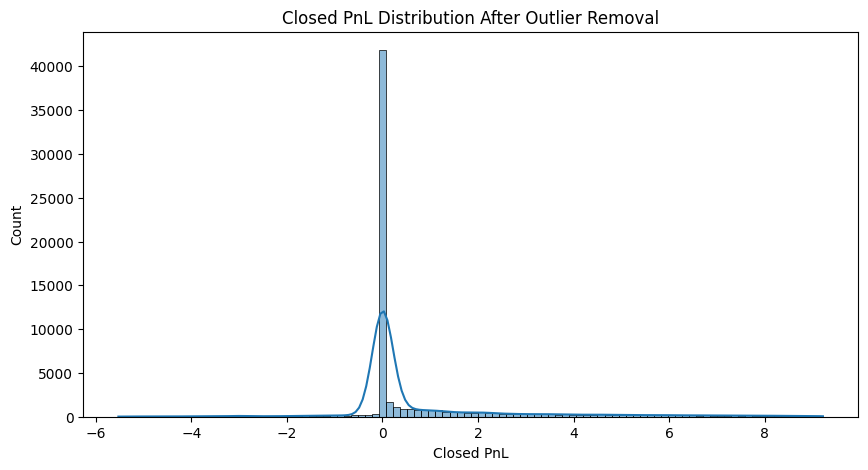

In [201]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Closed PnL'], bins=100, kde=True)
plt.title('Closed PnL Distribution After Outlier Removal')
plt.show()

In [227]:
initial_shape = df_cleaned.shape
initial_coin_counts = df_cleaned['Coin'].value_counts()
initial_unique_coins = initial_coin_counts.shape[0]

 # Identify valid and dropped coins
valid_coins = initial_coin_counts[initial_coin_counts >= 300].index
dropped_coins = initial_coin_counts[initial_coin_counts < 300]

# Filter the DataFrame
df_filtered = df_cleaned[df_cleaned['Coin'].isin(valid_coins)].copy()
final_shape = df_filtered.shape
final_unique_coins = df_filtered['Coin'].nunique()

#   Print results
print(f"🔹 Initial shape: {initial_shape}")
print(f"🔹 Final shape after dropping coins with < 300 rows: {final_shape}\n")

print(f"🔹 Initial number of unique coins: {initial_unique_coins}")
print(f"🔹 Final number of unique coins (≥ 300 rows): {final_unique_coins}")
print(f"🔹 Total coins dropped: {initial_unique_coins - final_unique_coins}\n")

print("📉 Coins dropped (with trade counts):")
print(dropped_coins.sort_values())

🔹 Initial shape: (64876, 17)
🔹 Final shape after dropping coins with < 300 rows: (57085, 17)

🔹 Initial number of unique coins: 205
🔹 Final number of unique coins (≥ 300 rows): 18
🔹 Total coins dropped: 187

📉 Coins dropped (with trade counts):
Coin
BABY         1
CYBER        1
@42          1
@93          1
@112         1
          ... 
AIXBT      231
W          234
ADA        235
VIRTUAL    242
LINK       254
Name: count, Length: 187, dtype: int64


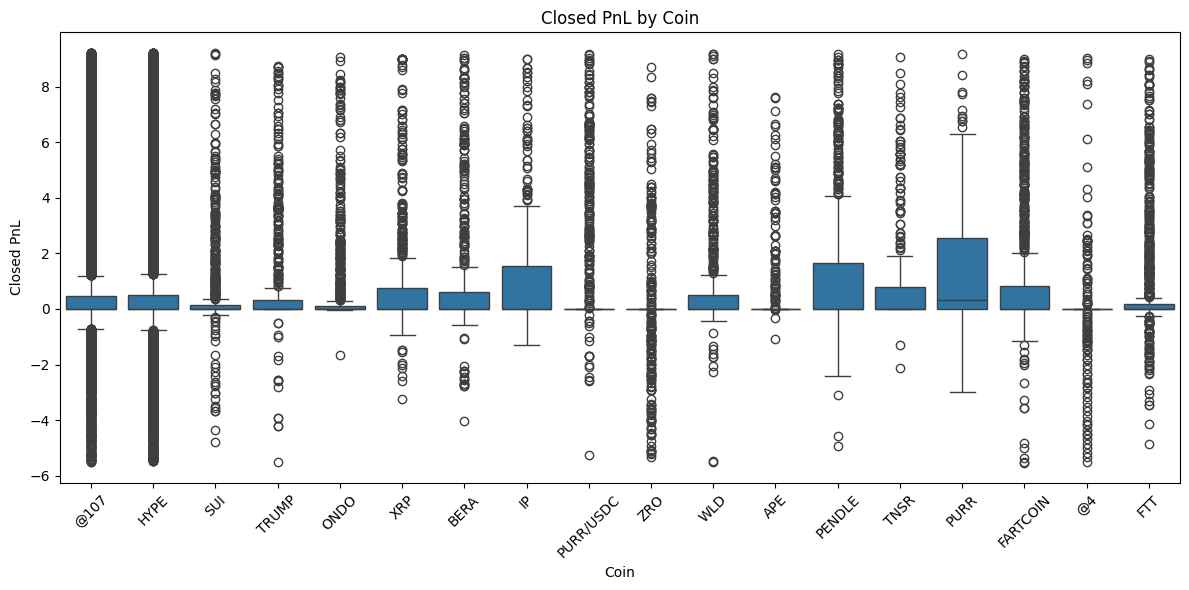

Average Closed PnL per Coin:
 Coin
PURR         1.432725
PENDLE       1.188810
IP           1.177324
BERA         1.074390
TNSR         0.999730
PURR/USDC    0.962555
FARTCOIN     0.913222
TRUMP        0.851170
XRP          0.840247
WLD          0.794681
HYPE         0.757735
@107         0.718565
ONDO         0.658719
FTT          0.613668
SUI          0.569161
APE          0.531748
ZRO          0.085713
@4           0.005431
Name: Closed PnL, dtype: float64


In [230]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Coin', y='Closed PnL')
plt.title('Closed PnL by Coin')
plt.xlabel('Coin')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 
avg_pnl_per_coin = df_filtered.groupby('Coin')['Closed PnL'].mean().sort_values(ascending=False)
print("Average Closed PnL per Coin:\n", avg_pnl_per_coin)

C:\Users\thera\AppData\Local\Temp\ipykernel_14652\4166710244.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='classification', y=feature, estimator='mean', palette='viridis')
C:\Users\thera\AppData\Local\Temp\ipykernel_14652\4166710244.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thera\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


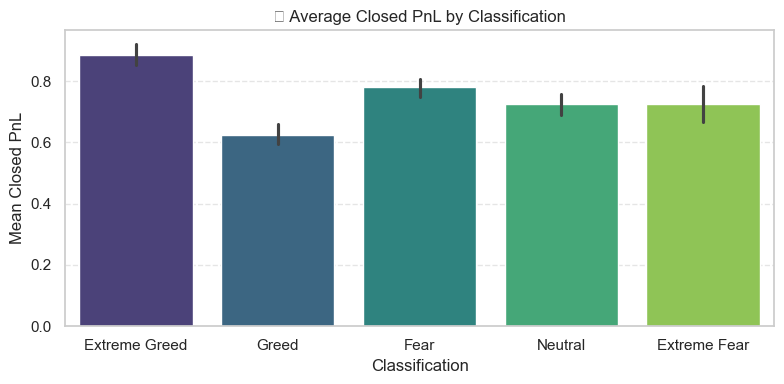

C:\Users\thera\AppData\Local\Temp\ipykernel_14652\4166710244.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='classification', y=feature, estimator='mean', palette='viridis')
C:\Users\thera\AppData\Local\Temp\ipykernel_14652\4166710244.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thera\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


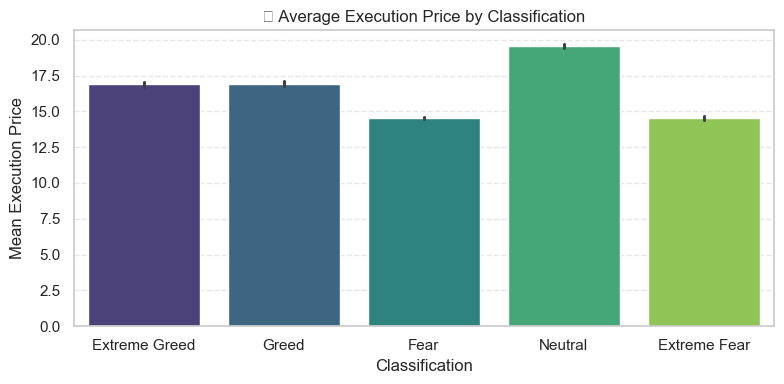

C:\Users\thera\AppData\Local\Temp\ipykernel_14652\4166710244.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='classification', y=feature, estimator='mean', palette='viridis')
C:\Users\thera\AppData\Local\Temp\ipykernel_14652\4166710244.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thera\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


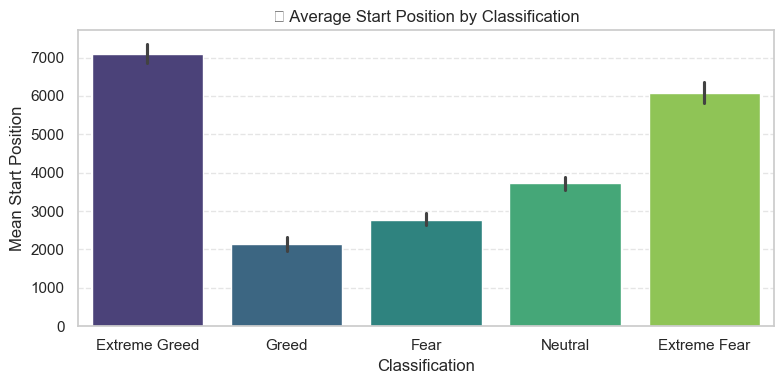

C:\Users\thera\AppData\Local\Temp\ipykernel_14652\4166710244.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='classification', y=feature, estimator='mean', palette='viridis')
C:\Users\thera\AppData\Local\Temp\ipykernel_14652\4166710244.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thera\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


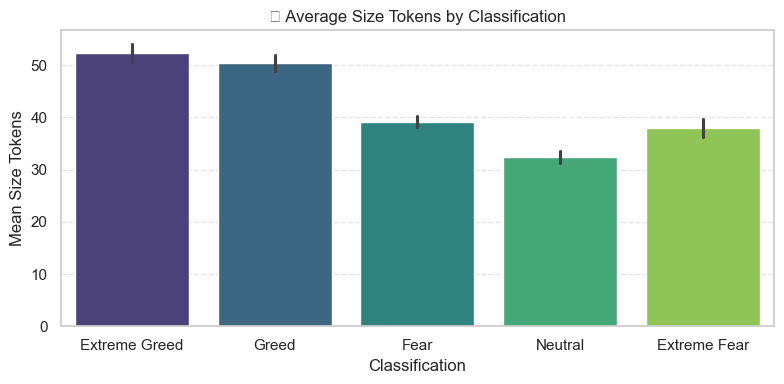

C:\Users\thera\AppData\Local\Temp\ipykernel_14652\4166710244.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='classification', y=feature, estimator='mean', palette='viridis')
C:\Users\thera\AppData\Local\Temp\ipykernel_14652\4166710244.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thera\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


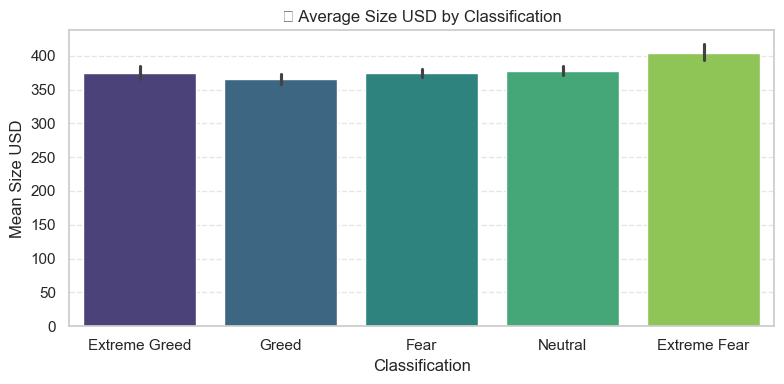

In [231]:
features = ['Closed PnL', 'Execution Price', 'Start Position', 'Size Tokens', 'Size USD']

# Set up plot style
sns.set(style="whitegrid")

# Plot each feature
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df_filtered, x='classification', y=feature, estimator='mean', palette='viridis')
    plt.title(f'📊 Average {feature} by Classification')
    plt.xlabel('Classification')
    plt.ylabel(f'Mean {feature}')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

In [232]:
# custom encoding for classification
classification_order = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}
# Apply encoding
df_filtered['classification_encoded'] = df_filtered['classification'].map(classification_order)

# Encode 'Coin' numerically using category codes
df_filtered['coin_encoded'] = df_filtered['Coin'].astype('category').cat.codes


In [233]:
# Convert if it's a datetime
df_filtered['timestamp_numeric'] = pd.to_datetime(df_filtered['timestamp'], errors='coerce').astype('int64') // 1_000_000_000
 


In [234]:
df_filtered.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Timestamp,Date,timestamp,value,classification,Sentiment_Value,classification_encoded,coin_encoded,timestamp_numeric
1,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,True,0.005600,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.8,4,0,1
2,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,True,0.050431,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.8,4,0,1
3,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,True,0.050043,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.8,4,0,1
4,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,True,0.003055,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.8,4,0,1
5,@107,7.9900,1.41,11.27,BUY,2024-12-02 22:50:00,1298.215466,Buy,0.0,True,0.000493,2024-10-27 03:33:20,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.8,4,0,1


In [237]:
df_filtered = df_filtered.drop(["Coin","timestamp","classification"], axis=1)


In [238]:
df_filtered.head()

,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Timestamp,Date,value,Sentiment_Value,classification_encoded,coin_encoded,timestamp_numeric
1,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,True,0.005600,2024-10-27 03:33:20,2024-12-02,80.0,0.8,4,0,1
2,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,True,0.050431,2024-10-27 03:33:20,2024-12-02,80.0,0.8,4,0,1
3,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,True,0.050043,2024-10-27 03:33:20,2024-12-02,80.0,0.8,4,0,1
4,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,True,0.003055,2024-10-27 03:33:20,2024-12-02,80.0,0.8,4,0,1
5,7.9900,1.41,11.27,BUY,2024-12-02 22:50:00,1298.215466,Buy,0.0,True,0.000493,2024-10-27 03:33:20,2024-12-02,80.0,0.8,4,0,1


C:\Users\thera\AppData\Local\Temp\ipykernel_14652\3598505491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='coin_encoded', y='Closed PnL', estimator='mean', palette='coolwarm')
C:\Users\thera\AppData\Local\Temp\ipykernel_14652\3598505491.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thera\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


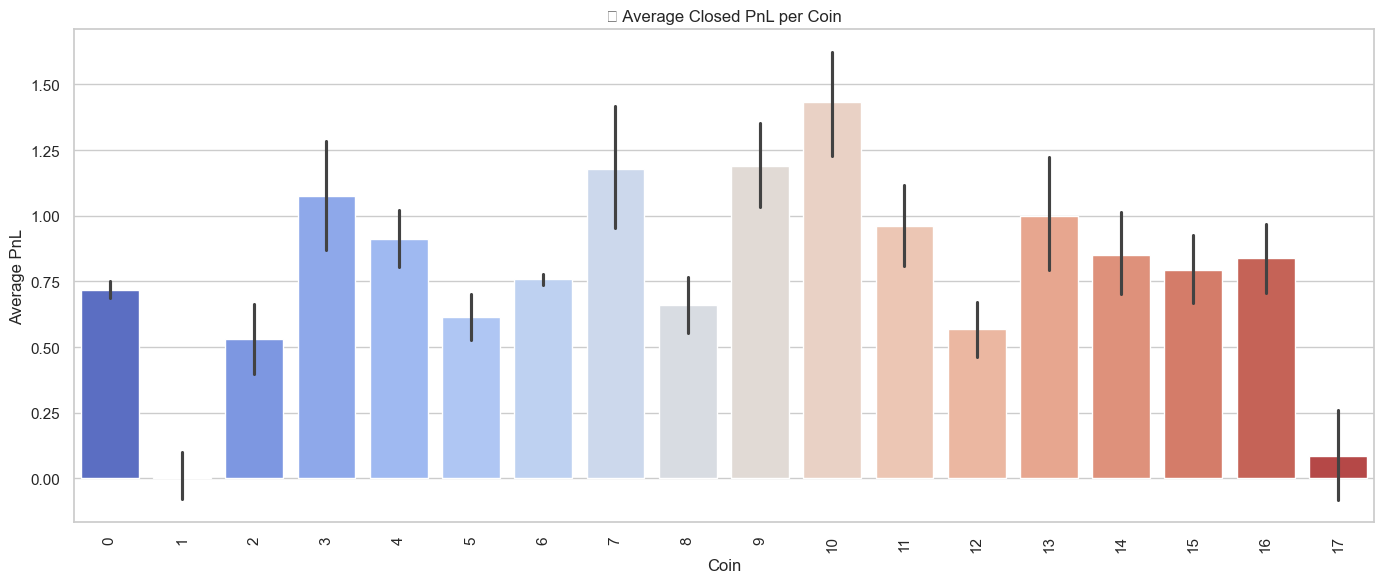

In [241]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_filtered, x='coin_encoded', y='Closed PnL', estimator='mean', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('📊 Average Closed PnL per Coin')
plt.xlabel('Coin')
plt.ylabel('Average PnL')
plt.tight_layout()
plt.show()


C:\Users\thera\AppData\Local\Temp\ipykernel_14652\3896802025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='classification_encoded', y='Closed PnL', estimator='mean', palette='viridis')
C:\Users\thera\AppData\Local\Temp\ipykernel_14652\3896802025.py:6: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thera\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


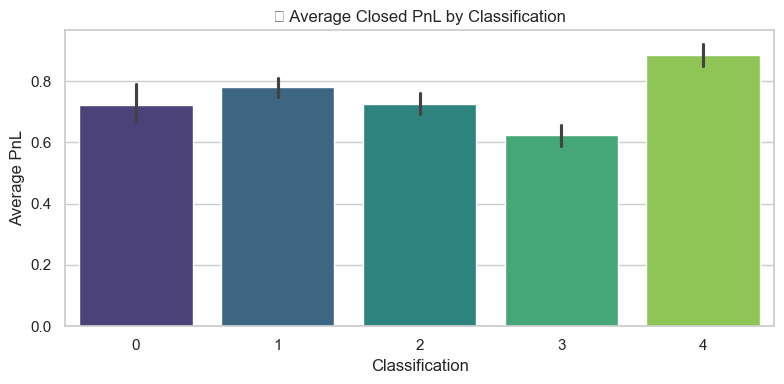

In [243]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df_filtered, x='classification_encoded', y='Closed PnL', estimator='mean', palette='viridis')
plt.title('📊 Average Closed PnL by Classification')
plt.xlabel('Classification')
plt.ylabel('Average PnL')
plt.tight_layout()
plt.show()


C:\Users\thera\AppData\Local\Temp\ipykernel_14652\2107338262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x='classification_encoded', y='Size USD', estimator='mean', palette='mako')
C:\Users\thera\AppData\Local\Temp\ipykernel_14652\2107338262.py:6: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thera\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


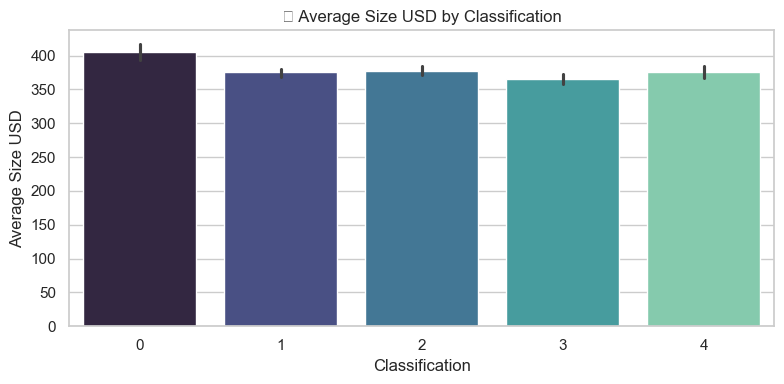

In [244]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df_filtered, x='classification_encoded', y='Size USD', estimator='mean', palette='mako')
plt.title('💸 Average Size USD by Classification')
plt.xlabel('Classification')
plt.ylabel('Average Size USD')
plt.tight_layout()
plt.show()


C:\Users\thera\AppData\Local\Temp\ipykernel_14652\319859183.py:7: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thera\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


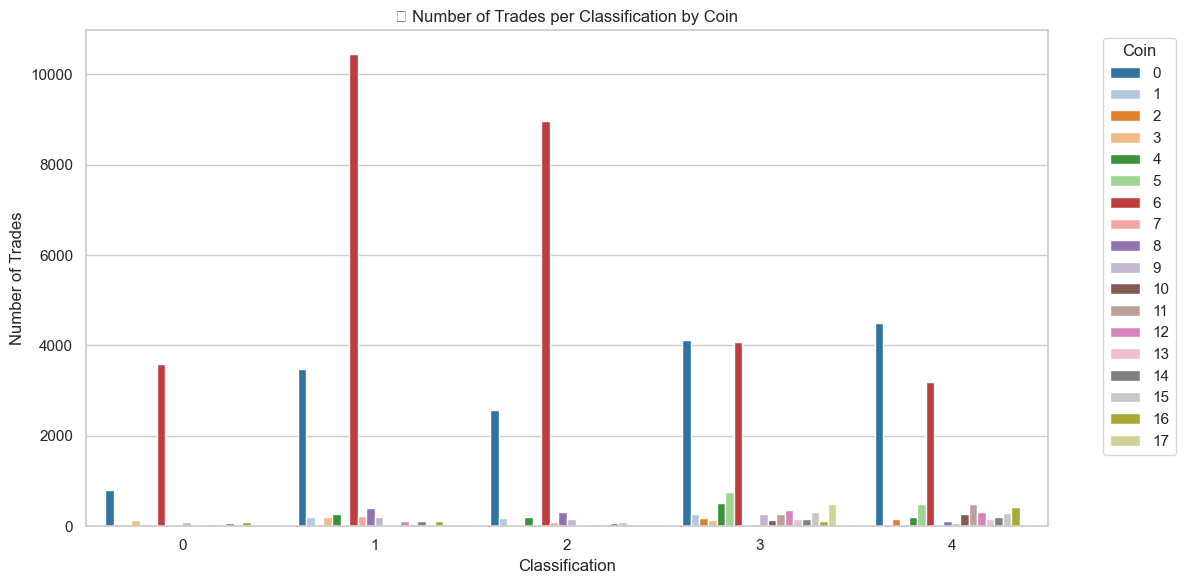

In [245]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='classification_encoded', hue='coin_encoded', palette='tab20')
plt.title('🔢 Number of Trades per Classification by Coin')
plt.xlabel('Classification')
plt.ylabel('Number of Trades')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Coin')
plt.tight_layout()
plt.show()


In [246]:
df_model = df_filtered[['Closed PnL', 'classification_encoded', 'coin_encoded', 'timestamp_numeric', 'Size USD']].dropna()


In [250]:
 df_model.head()

,Closed PnL,classification_encoded,coin_encoded,timestamp_numeric,Size USD
1,0.0,4,0,1,127.68
2,0.0,4,0,1,1150.63
3,0.0,4,0,1,1142.04
4,0.0,4,0,1,69.75
5,0.0,4,0,1,11.27


In [255]:
df_model['log_pnl'] = np.log1p(df_model['Closed PnL'] - df_model['Closed PnL'].min() + 1)


In [258]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
X = df_model[['classification_encoded', 'coin_encoded', 'timestamp_numeric', 'Size USD']]
y = df_model['log_pnl']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#   Train Random Forest Regressor  
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#   Predict & Evaluate  
y_pred = rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f" R² Score: {r2:.4f}")
print(f" RMSE: {rmse:.4f}")

🔍 R² Score: 0.0210
🔍 RMSE: 0.2089


C:\Users\thera\AppData\Local\Temp\ipykernel_14652\1811643946.py:8: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\thera\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


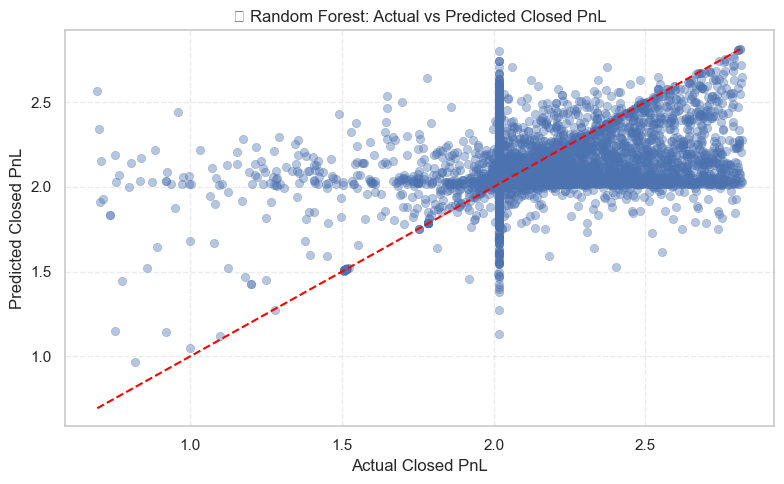

In [259]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Closed PnL')
plt.ylabel('Predicted Closed PnL')
plt.title('🎯 Random Forest: Actual vs Predicted Closed PnL')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [260]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📈 XGBoost R² Score: {r2:.4f}")
print(f"📉 XGBoost RMSE: {rmse:.4f}")

ModuleNotFoundError: No module named 'xgboost'